In [2]:
import numpy as np
import pyformind as pfm
import matplotlib.pyplot as plt

In [5]:
# Takes roughly 200 seconds
n_year = 100
n_sim = 50

bmr = np.zeros((n_year, n_sim))
gpp = np.zeros((n_year, n_sim))
nee = np.zeros((n_year, n_sim))
assert n_year < 3001 # Climate file is of 3000 years

model = pfm.Model()
model.read_par_file("sim_files/parameter_files/example.par")

for sim in range(n_sim):
    model.reset()
    model.par.randomGeneratorSeedDisabled = False
    model.par.randomGeneratorSeed = np.random.randint(2147483647)
    for year in range(n_year):
        model.run(1)
        nee[year, sim] = model.output.C_flux
        gpp[year, sim] = model.output.gpp
        bmr[year, sim] = model.output.BiomassDEATHCUMrate[0]

INFO: Default value of the number of simulated plots per hectars is used (switches.Maxplot = 25).
INFO: Default value for the hectar size is used (switches.Hectare = 10000.0).
INFO: Default value for the side length of a hectare is used (switches.Hecside = 100.0).
INFO: Default value of the number of simulated plots per hectars is used (switches.Maxplot = 25).
INFO: Default value for the hectar size is used (switches.Hectare = 10000.0).
INFO: Default value for the side length of a hectare is used (switches.Hecside = 100.0).


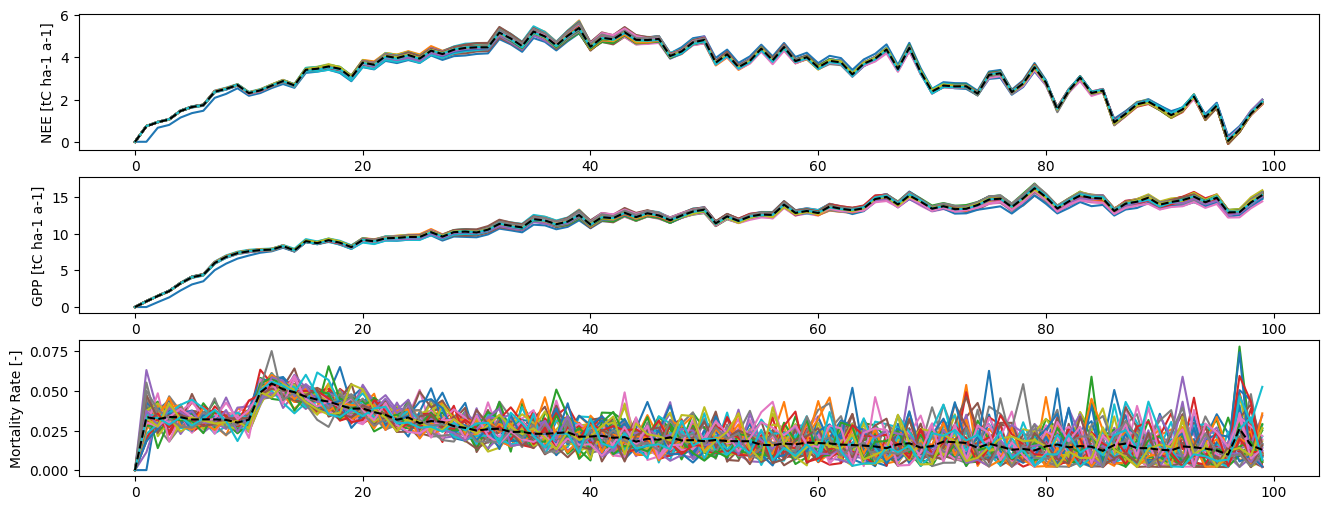

In [6]:

fig, ax = plt.subplots(3,1, figsize = (16,6))
ax[0].plot(nee)
ax[0].plot(nee.mean(axis=1), color = "k", linestyle="--")
ax[0].set_ylabel("NEE [tC ha-1 a-1]")
ax[1].plot(gpp)
ax[1].plot(gpp.mean(axis=1), color = "k", linestyle="--")
ax[1].set_ylabel("GPP [tC ha-1 a-1]")
ax[2].plot(bmr)
ax[2].plot(bmr.mean(axis=1), color = "k", linestyle="--")
ax[2].set_ylabel("Mortality Rate [-]")
plt.show()